## Import Data


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
import pandas as pd
data = pd.read_csv("DukuhKupang.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40043 entries, 0 to 40042
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timezone                  40043 non-null  object 
 1   Datetime                  40043 non-null  object 
 2   AQI US                    40043 non-null  int64  
 3   AQI CN                    40043 non-null  int64  
 4   PM2.5 (ug/m3)             40043 non-null  float64
 5   PM10 (ug/m3)              40043 non-null  int64  
 6   CO2 (ppm)                 40043 non-null  int64  
 7   Temperature (Celsius)     40043 non-null  float64
 8   Temperature (Fahrenheit)  40043 non-null  float64
 9   Humidity (%)              40043 non-null  int64  
 10  HCHO (ppb)                0 non-null      float64
 11  TVOC (ppb)                0 non-null      float64
dtypes: float64(5), int64(5), object(2)
memory usage: 3.7+ MB


In [6]:
drop_cols = ['Datetime','Timezone','AQI CN','AQI US','HCHO (ppb)','TVOC (ppb)','Temperature (Fahrenheit)']
data = data.drop(columns=drop_cols)

In [7]:
print("Missing values:\n", data.isnull().sum())
print("\nDuplicated rows:", data.duplicated().sum())

Missing values:
 PM2.5 (ug/m3)            0
PM10 (ug/m3)             0
CO2 (ppm)                0
Temperature (Celsius)    0
Humidity (%)             0
dtype: int64

Duplicated rows: 1227


In [8]:
data.duplicated().sum()

1227

In [9]:
# Hapus NA & duplicate
data = data.dropna().drop_duplicates()
print("Shape setelah pembersihan:", data.shape)

# %%
# Statistik deskriptif
display(data.describe())

Shape setelah pembersihan: (38816, 5)


,PM2.5 (ug/m3),PM10 (ug/m3),CO2 (ppm),Temperature (Celsius),Humidity (%)
count,38816.000000,38816.000000,38816.000000,38816.000000,38816.000000
mean,39.754854,76.841019,430.722795,28.753156,79.632471
std,33.911649,67.678937,21.410946,3.631565,12.615942
min,3.000000,3.000000,390.000000,23.800000,41.000000
25%,19.000000,36.000000,416.000000,26.000000,72.000000
50%,30.000000,57.000000,426.000000,27.500000,83.000000
75%,49.000000,92.000000,440.000000,30.700000,90.000000
max,1798.800000,2000.000000,628.000000,41.500000,97.000000


In [10]:
## cek data Oulier

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_indices = data[(data < lower_bound) | (data > upper_bound)].dropna(how='all').index
print(f"Number of potential outliers detected: {len(outlier_indices)}")

Number of potential outliers detected: 5015


In [11]:
## Hapus data Oulier
data_cleaned_looped = data.copy() # Create a copy to avoid modifying the original data

while True:
    Q1 = data_cleaned_looped.quantile(0.25)
    Q3 = data_cleaned_looped.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_indices = data_cleaned_looped[(data_cleaned_looped < lower_bound) | (data_cleaned_looped > upper_bound)].dropna(how='all').index

    if len(outlier_indices) == 0:
        print("No more outliers detected.")
        break
    else:
        print(f"Removing {len(outlier_indices)} potential outliers.")
        data_cleaned_looped = data_cleaned_looped.drop(outlier_indices)

print(f"Number of rows after removing outliers iteratively: {len(data_cleaned_looped)}")
display(data_cleaned_looped.head())

Removing 5015 potential outliers.
Removing 2056 potential outliers.
Removing 984 potential outliers.
Removing 430 potential outliers.
Removing 228 potential outliers.
Removing 134 potential outliers.
Removing 169 potential outliers.
Removing 276 potential outliers.
Removing 78 potential outliers.
No more outliers detected.
Number of rows after removing outliers iteratively: 29446


,PM2.5 (ug/m3),PM10 (ug/m3),CO2 (ppm),Temperature (Celsius),Humidity (%)
25,16.0,35,427,37.6,49
26,12.0,30,426,37.6,48
27,16.0,35,422,37.5,50
28,12.0,18,421,37.3,49
29,11.0,13,424,37.1,50


In [12]:
data_cleaned_looped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29446 entries, 25 to 40042
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PM2.5 (ug/m3)          29446 non-null  float64
 1   PM10 (ug/m3)           29446 non-null  int64  
 2   CO2 (ppm)              29446 non-null  int64  
 3   Temperature (Celsius)  29446 non-null  float64
 4   Humidity (%)           29446 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 1.3 MB


<Axes: >

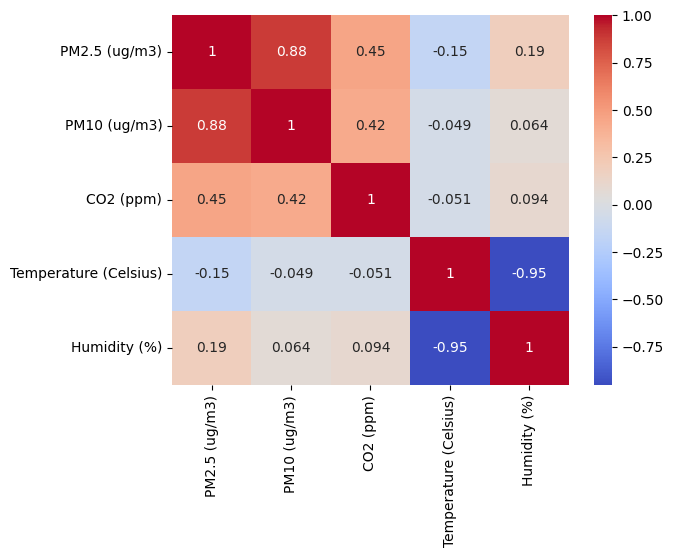

In [13]:
## Heatmap Data
import seaborn as sns
sns.heatmap(data_cleaned_looped.corr(), annot=True, cmap='coolwarm')

# Prepocessing

In [14]:
from sklearn.model_selection import train_test_split

# Asumsikan data_cleaned_looped adalah data numerik yang sudah dibersihkan
X = data_cleaned_looped.copy()

# Split sebelum apa pun!
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42, stratify=None)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # FIT HANYA DI SINI
X_test_scaled = scaler.transform(X_test)         # HANYA TRANSFORM, TIDAK FIT

In [18]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from tqdm import tqdm

# Range jumlah cluster yang diuji
cluster_range = range(2, 11)  # bisa diatur sesuai kebutuhan

silhouette_scores = {}

# Loop dengan tqdm
for n_clusters in tqdm(cluster_range, desc="Evaluating clusters", unit="cluster"):
    ahc = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward")
    labels = ahc.fit_predict(X_train_scaled)
    score = silhouette_score(X_train_scaled, labels)
    print(f"n_cluster = {n_clusters} Silhouette Score = {score}")
    silhouette_scores[n_clusters] = score

# Cari jumlah cluster optimal
optimal_clusters = max(silhouette_scores, key=silhouette_scores.get)

print("\n--- Analisis Silhouette Score ---")
for n, score in silhouette_scores.items():
    print(f"Jumlah cluster {n}: Silhouette Score = {score:.4f}")

print(f"\nJumlah cluster optimal berdasarkan Silhouette Score: {optimal_clusters}")


Evaluating clusters:  11%|█         | 1/9 [00:14<01:53, 14.22s/cluster]

n_cluster = 2 Silhouette Score = 0.27651572576719835


Evaluating clusters:  22%|██▏       | 2/9 [00:26<01:32, 13.20s/cluster]

n_cluster = 3 Silhouette Score = 0.2855853141291173


Evaluating clusters:  33%|███▎      | 3/9 [00:39<01:17, 12.90s/cluster]

n_cluster = 4 Silhouette Score = 0.2672752045226276


Evaluating clusters:  44%|████▍     | 4/9 [00:50<01:00, 12.12s/cluster]

n_cluster = 5 Silhouette Score = 0.20957429195793242


Evaluating clusters:  56%|█████▌    | 5/9 [01:02<00:48, 12.15s/cluster]

n_cluster = 6 Silhouette Score = 0.2002747195089634


Evaluating clusters:  67%|██████▋   | 6/9 [01:13<00:34, 11.67s/cluster]

n_cluster = 7 Silhouette Score = 0.19763491262260305


Evaluating clusters:  78%|███████▊  | 7/9 [01:23<00:22, 11.37s/cluster]

n_cluster = 8 Silhouette Score = 0.20225050212986498


Evaluating clusters:  89%|████████▉ | 8/9 [01:36<00:11, 11.68s/cluster]

n_cluster = 9 Silhouette Score = 0.18561375342075614


Evaluating clusters: 100%|██████████| 9/9 [01:48<00:00, 12.01s/cluster]

n_cluster = 10 Silhouette Score = 0.16807241359488992

--- Analisis Silhouette Score ---
Jumlah cluster 2: Silhouette Score = 0.2765
Jumlah cluster 3: Silhouette Score = 0.2856
Jumlah cluster 4: Silhouette Score = 0.2673
Jumlah cluster 5: Silhouette Score = 0.2096
Jumlah cluster 6: Silhouette Score = 0.2003
Jumlah cluster 7: Silhouette Score = 0.1976
Jumlah cluster 8: Silhouette Score = 0.2023
Jumlah cluster 9: Silhouette Score = 0.1856
Jumlah cluster 10: Silhouette Score = 0.1681

Jumlah cluster optimal berdasarkan Silhouette Score: 3


Silhouette Score: 0.2856
Davies-Bouldin Index: 1.1860


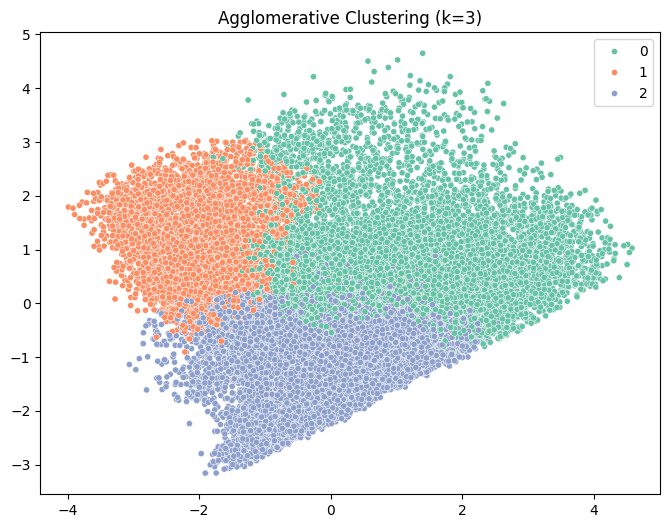

             PM2.5 (ug/m3)  PM10 (ug/m3)   CO2 (ppm)  Temperature (Celsius)  \
Cluster_AHC                                                                   
0                40.530758     76.762046  432.419470              29.075120   
1                17.971731     36.686396  418.327518              33.742337   
2                23.205782     41.233483  418.070008              26.588234   

             Humidity (%)  
Cluster_AHC                
0               78.130253  
1               61.690592  
2               86.757812  


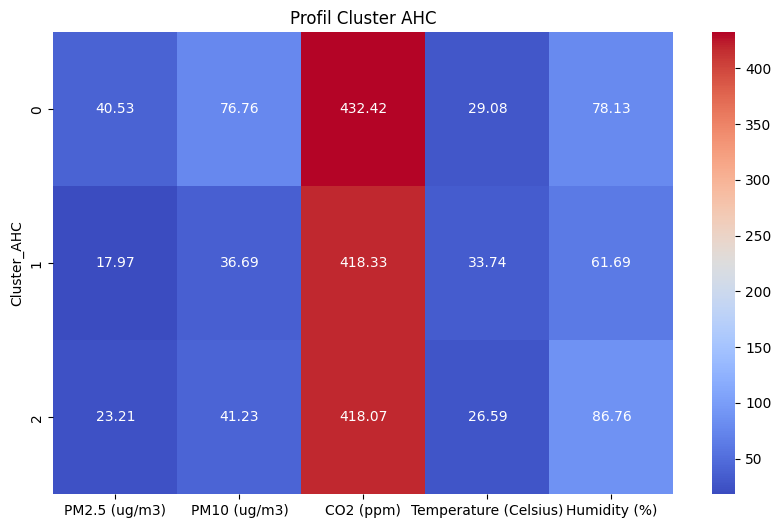

In [19]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Fit dengan jumlah cluster optimal
ahc_optimal = AgglomerativeClustering(n_clusters=optimal_clusters, linkage="ward")
ahc_labels = ahc_optimal.fit_predict(X_train_scaled)

# Evaluasi
sil_score = silhouette_score(X_train_scaled, ahc_labels)
dbi_score = davies_bouldin_score(X_train_scaled, ahc_labels)
print(f"Silhouette Score: {sil_score:.4f}")
print(f"Davies-Bouldin Index: {dbi_score:.4f}")

# %%
# Visualisasi PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=ahc_labels, palette="Set2", s=20)
plt.title(f"Agglomerative Clustering (k={optimal_clusters})")
plt.show()

# %%
# Profil cluster
X_train["Cluster_AHC"] = ahc_labels
cluster_profile = X_train.groupby("Cluster_AHC").mean()
print(cluster_profile)

plt.figure(figsize=(10,6))
sns.heatmap(cluster_profile, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Profil Cluster AHC")
plt.show()

AQI_Category  Good  Moderate  Satisfactory
Cluster_AHC                               
0              780      1431          5904
1             3676         1           851
2             7307         9          3597


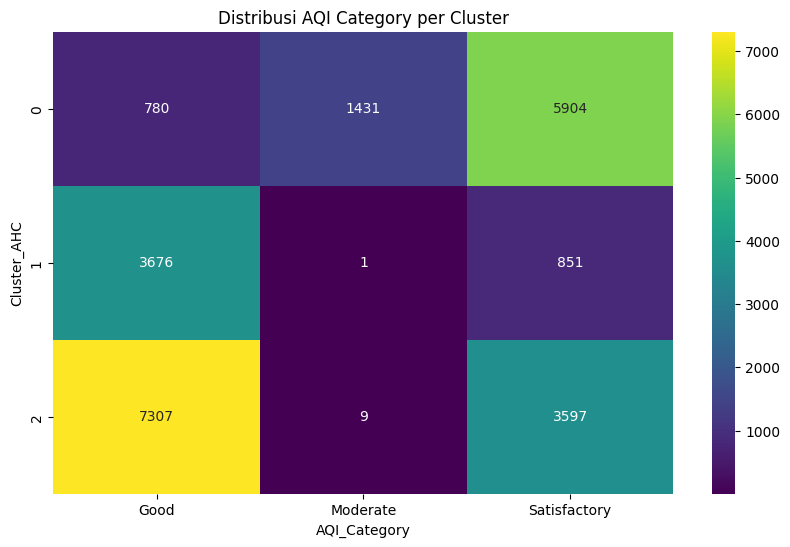

Adjusted Rand Index (ARI): 0.1957


In [20]:
# --- Fungsi AQI ---
def aqi_pm25(v):
    if v <= 30: return "Good"
    elif v <= 60: return "Satisfactory"
    elif v <= 90: return "Moderate"
    elif v <= 120: return "Poor"
    elif v <= 250: return "Very Poor"
    else: return "Severe"

def aqi_pm10(v):
    if v <= 50: return "Good"
    elif v <= 100: return "Satisfactory"
    elif v <= 250: return "Moderate"
    elif v <= 350: return "Poor"
    elif v <= 430: return "Very Poor"
    else: return "Severe"

def calculate_aqi(row):
    cat_pm25 = aqi_pm25(row["PM2.5 (ug/m3)"])
    cat_pm10 = aqi_pm10(row["PM10 (ug/m3)"])
    categories = ["Good","Satisfactory","Moderate","Poor","Very Poor","Severe"]
    return max([cat_pm25, cat_pm10], key=lambda x: categories.index(x))

# Tambahkan kategori AQI
X_train["AQI_Category"] = X_train.apply(calculate_aqi, axis=1)

# Crosstab cluster vs AQI
crosstab = pd.crosstab(X_train["Cluster_AHC"], X_train["AQI_Category"])
print(crosstab)

plt.figure(figsize=(10,6))
sns.heatmap(crosstab, annot=True, cmap="viridis", fmt="d")
plt.title("Distribusi AQI Category per Cluster")
plt.show()

# %%
# ARI Score
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(X_train["AQI_Category"], X_train["Cluster_AHC"])
print(f"Adjusted Rand Index (ARI): {ari:.4f}")